In [ ]:
import ROOT

import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

n_run = 164

calibration = { "0" : [0,1,0], 
                "1" : [-100,1.02,4.0e-5],
                "2" : [0,1.05,3.5e-5],
                "3" : [-100,1.26,2.6e-5],
                "4" : [-100,1.24,2.6e-5],
                "5" : [-100,1.20,2.0e-5],
                "6" : [-100,1.00,4.0e-5]
                }

In [2]:
f1 = ROOT.TFile("../data/root/run" + str(n_run) + ".root")
t1 = f1.Get("DataR")

n_entries = t1.GetEntries()

data = { "Channel" : [], "Time" : [], "Energy" : [] }
for i in tqdm(range(n_entries)):
    t1.GetEntry(i)
    data["Channel"].append(t1.Channel)
    data["Time"].append(t1.TimeStamp)
    data["Energy"].append(t1.Energy)

df = pd.DataFrame(data)

# Sort by time
df = df.sort_values(by=["Time"])

# Reset index
df = df.reset_index(drop=True)

100%|███████████████████████████| 34658554/34658554 [02:18<00:00, 250474.64it/s]


/tmp/ipykernel_1718717/2958729909.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2336.40404  591.69684 1352.15616 ...  390.35136 5334.525   6258.33044]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["Channel"] == int(key), "Energy"] = calibration[key][0] + calibration[key][1] * df.loc[df["Channel"] == int(key), "Energy"] + calibration[key][2] * df.loc[df["Channel"] == int(key), "Energy"]**2


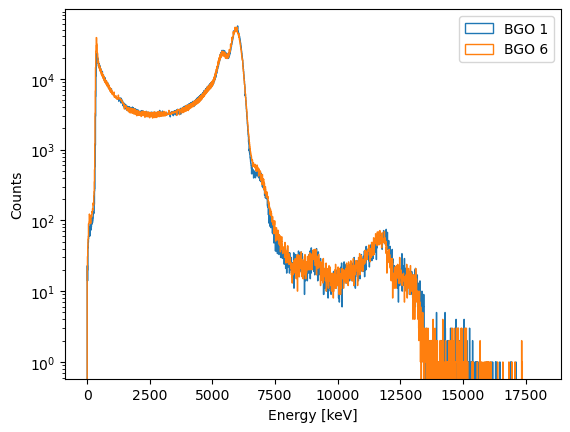

In [3]:
# Apply calibration
for key in calibration:
    if key == "0": continue
    df.loc[df["Channel"] == int(key), "Energy"] = calibration[key][0] + calibration[key][1] * df.loc[df["Channel"] == int(key), "Energy"] + calibration[key][2] * df.loc[df["Channel"] == int(key), "Energy"]**2

# Plot overlapped histograms to check calibration
plt.figure()
for key in calibration:
    if key == "0": continue
    if key not in ["1", "6"]: continue
    plt.hist(df.loc[df["Channel"] == int(key), "Energy"], bins=1800, range=(0,18000), histtype="step", label=f"BGO {key}")

plt.xlabel("Energy [keV]")
plt.ylabel("Counts")

plt.yscale("log")

plt.legend()

plt.show()

In [4]:
window_size = 1e1 # Time is in 10 ns

# Create time window bins
df['Time Window'] = (df['Time'] // window_size) * window_size
    
# Group by time window and sum energy
grouped_df = df.groupby('Time Window')['Energy'].sum().reset_index()

In [5]:
plt.hist(df['Energy'], bins=1800, range=(0,18000), histtype='step', label='Run ' + n_run)

plt.xlabel('Energy [keV]')
plt.ylabel('Counts')

plt.yscale('log')

plt.show( )

TypeError: can only concatenate str (not "int") to str